IMPORT LIBRARY

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 

In [ ]:
# Import Data
data=pd.read_csv('../dataset_phishing.csv')
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
# Data Encoding 
data['target'] = pd.get_dummies(data['status'])['legitimate'].astype('int')
data.drop('status',axis = 1, inplace=True)
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,target
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


In [ ]:
# Data splits
X = data.copy()
y = X.pop('target')
X = data.drop(columns=['url','target'])
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, test_size=0.2)
X_train = np.expand_dims(X_train, axis=2)
X_valid = np.expand_dims(X_valid, axis=2)
input_shape = [X_train[1].shape]
print("Input shape is ", input_shape)

Input shape is  [(87, 1)]


MODEL

In [ ]:
# Build Model
model = keras.Sequential([
                          

    layers.Conv1D(filters=64, kernel_size=3, input_shape=(87, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64,kernel_size=3),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64,kernel_size=3),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=32,kernel_size=3),
    layers.MaxPooling1D(pool_size=2),    
    layers.Activation('relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dense(units=1)
])

# Compiling 
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=["acc"])
model.summary()
from tensorflow.keras.utils import plot_model

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_114 (Conv1D)         (None, 85, 64)            256       
                                                                 
 max_pooling1d_92 (MaxPoolin  (None, 42, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_115 (Conv1D)         (None, 40, 64)            12352     
                                                                 
 max_pooling1d_93 (MaxPoolin  (None, 20, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_116 (Conv1D)         (None, 18, 64)            12352     
                                                                 
 max_pooling1d_94 (MaxPoolin  (None, 9, 64)          

In [ ]:
# Fitting to the training set
early_stopping = keras.callbacks.EarlyStopping(
    patience=50,
    min_delta=0.0001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=300,
    callbacks=[early_stopping],
)

Epoch 1/300
143/143 [==============================] - 3s 17ms/step - loss: 5.3176 - acc: 0.6472 - val_loss: 0.4164 - val_acc: 0.3906
Epoch 2/300
143/143 [==============================] - 2s 16ms/step - loss: 0.3404 - acc: 0.7375 - val_loss: 0.1251 - val_acc: 0.8556
Epoch 3/300
143/143 [==============================] - 2s 15ms/step - loss: 0.1812 - acc: 0.8244 - val_loss: 0.1115 - val_acc: 0.8696
Epoch 4/300
143/143 [==============================] - 2s 15ms/step - loss: 0.1384 - acc: 0.8364 - val_loss: 0.1081 - val_acc: 0.8740
Epoch 5/300
143/143 [==============================] - 2s 16ms/step - loss: 0.1218 - acc: 0.8541 - val_loss: 0.1073 - val_acc: 0.8775
Epoch 6/300
143/143 [==============================] - 2s 16ms/step - loss: 0.1156 - acc: 0.8563 - val_loss: 0.0953 - val_acc: 0.8854
Epoch 7/300
143/143 [==============================] - 2s 16ms/step - loss: 0.1073 - acc: 0.8666 - val_loss: 0.0906 - val_acc: 0.8815
Epoch 8/300
143/143 [==============================] - 2s 16ms

RESULT & VISUALISATION

Best Validation Loss: 0.0632
Best Validation Accuracy: 0.9296


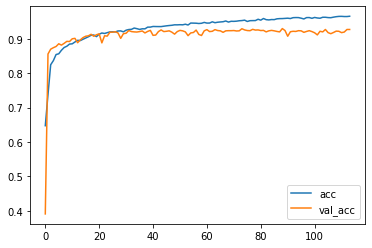

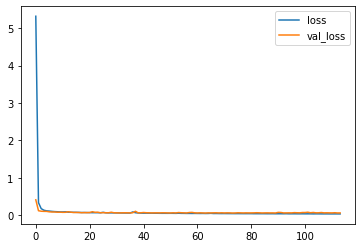

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['acc', 'val_acc']].plot()
history_df.loc[0:, ['loss', 'val_loss']].plot()


print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_acc'].max()))